In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import time
import random
from bs4 import BeautifulSoup
import seaborn as sns
from statsmodels.nonparametric.kernel_regression import KernelReg
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [202]:
prices_data = pd.read_csv("prices_data.csv")
data_house_features = pd.read_csv("house_features.csv")
metro_data = pd.read_csv("metro_data.csv")

merged_table = pd.read_csv("merged_table.csv")

In [193]:
matched_data = pd.read_csv("matched_data3.csv")

In [178]:
matched_data.shape

(3336, 35)

## Cleaning data for R

In [113]:
merged_table.isna().sum().sort_values(ascending=False).head(10)

value                                           0
Спортивная площадка                             0
discounted_value                                0
cumprod                                         0
Сокращение расстояния                           0
Ближайшая станция до тритмента                  0
Ближайшая станция до тритмента расстояние       0
Ближайшая станция после тритмента               0
Ближайшая станция после тритмента расстояние    0
Название третьей станции                        0
dtype: int64

In [132]:
merged_table.head()

,value,reportDate,prettyValue,realty_id,Адрес,URL,Год постройки,Тип дома,Этажность,Строительная серия,...,Название второй станции,Название третьей станции,Ближайшая станция после тритмента расстояние,Ближайшая станция после тритмента,Ближайшая станция до тритмента расстояние,Ближайшая станция до тритмента,Сокращение расстояния,cumprod,discounted_value,Number of queries
0,220493.0,2020-03-01,220 493 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,Беляево,Тропарёво,881.0,Университет Дружбы Народов,2370.0,Беляево,1489.0,1.0000,220493.000000,145.0
1,228764.0,2020-04-01,228 764 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,Беляево,Тропарёво,881.0,Университет Дружбы Народов,2370.0,Беляево,1489.0,1.0000,228764.000000,104.0
2,228764.0,2020-05-01,228 764 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,Беляево,Тропарёво,881.0,Университет Дружбы Народов,2370.0,Беляево,1489.0,1.0000,228764.000000,89.0
3,239315.0,2020-06-01,239 315 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,Беляево,Тропарёво,881.0,Университет Дружбы Народов,2370.0,Беляево,1489.0,1.0508,227745.527217,140.0
4,236383.0,2020-07-01,236 383 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,Беляево,Тропарёво,881.0,Университет Дружбы Народов,2370.0,Беляево,1489.0,1.0508,224955.272174,285.0


In [109]:
merged_table.dropna(inplace = True)

In [104]:
merged_table = merged_table.drop(columns = ["Строительная серия", "Фонд капитального ремонта", "Мусоропроводов", "Отопление", "Тип дома", "Газоснабжение"])

In [118]:
matched_data.isna().sum().sort_values(ascending=False).head()

value                                        0
Ближайшая.станция.до.тритмента.расстояние    0
Расстояние.до.третьей.станции                0
Название.первой.станции                      0
Название.второй.станции                      0
dtype: int64

In [86]:
matched_data.head()

,value,reportDate,prettyValue,realty_id,Адрес,URL,Год.постройки,Тип.дома,Этажность,Строительная.серия,...,weights,subclass,dummy_2021,dummy_2022,dummy_2023,dummy_2024,dummy_2025,Универcитет,Корниловская,Генерала_тюленева
0,220493.0,2020-03-01,220 493 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,1,1,0,0,0,0,0,1,0,0
1,228764.0,2020-04-01,228 764 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,1,2,0,0,0,0,0,1,0,0
2,228764.0,2020-05-01,228 764 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,1,3,0,0,0,0,0,1,0,0
3,239315.0,2020-06-01,239 315 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,1,4,0,0,0,0,0,1,0,0
4,236383.0,2020-07-01,236 383 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,1,5,0,0,0,0,0,1,0,0


In [15]:
matched_data.groupby("treatment")["Год.постройки"].mean()

treatment
0    1980.469268
1    1984.404062
Name: Год.постройки, dtype: float64

In [112]:
merged_table.to_csv("prematched.csv", index = False)

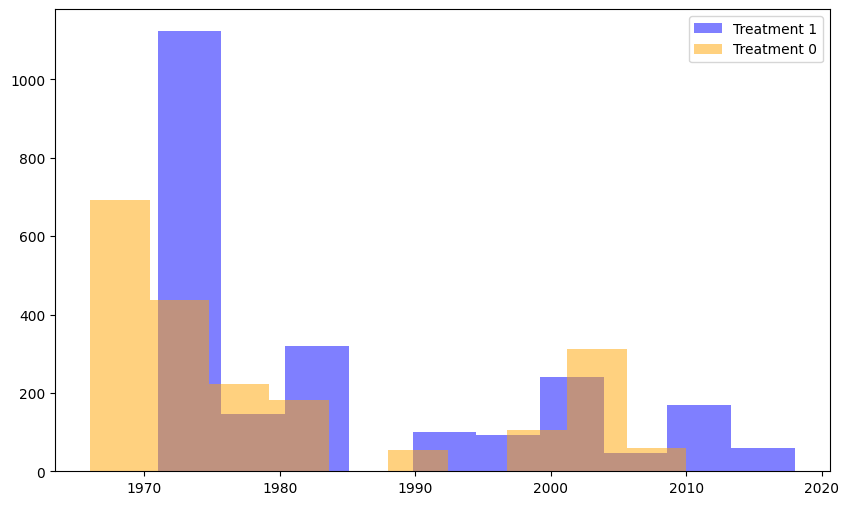

In [60]:
plt.figure(figsize=(10, 6))

plt.hist(
    merged_table[merged_table["treatment"] == 1]["Год постройки"],
    bins=10, alpha=0.5, label="Treatment 1", color="blue"
)

plt.hist(
    merged_table[merged_table["treatment"] == 0]["Год постройки"],
    bins=10, alpha=0.5, label="Treatment 0", color="orange"
)

plt.legend()
plt.savefig("age_comparison", dpi=300)
plt.show()


## LPR

In [203]:
merged_table_lpr = merged_table[merged_table["reportDate"] >= "2021-06-01"].copy()
merged_table_lpr.loc[:, "log_discounted_value"] = np.log(merged_table_lpr["discounted_value"])

In [204]:
merged_table_lpr['post'] = (merged_table_lpr['reportDate'] > '2024-09-01').astype(int)
lpr_data = merged_table_lpr.groupby(["post", "Сокращение расстояния"])["log_discounted_value"].median().reset_index()

<Axes: >

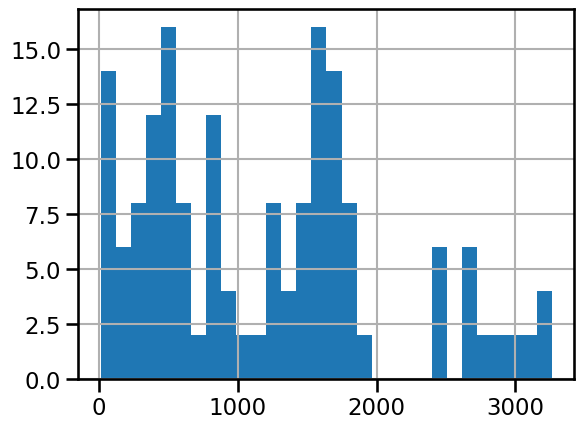

In [175]:
lpr_data["Сокращение расстояния"].hist(bins=30)


In [ ]:
lpr_data

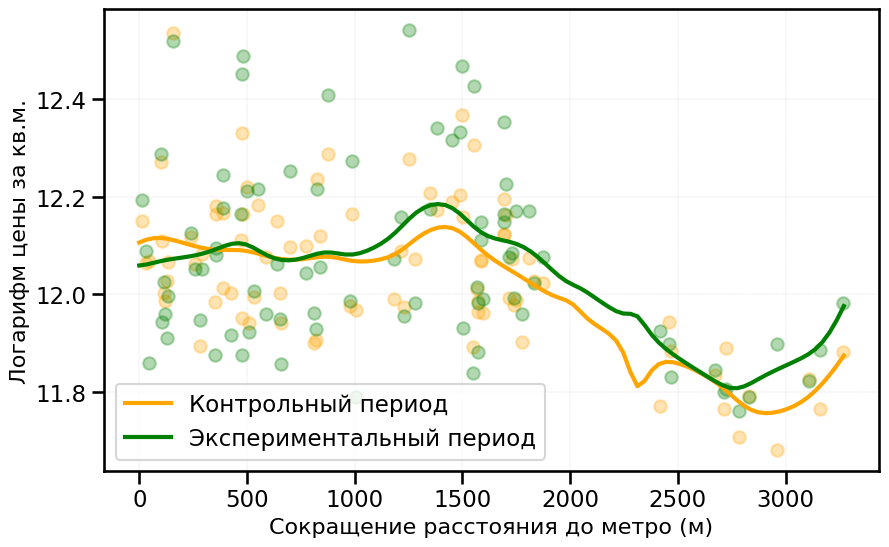

In [205]:
import seaborn as sns

lpr_before = lpr_data[lpr_data["post"] == 0]
lpr_after = lpr_data[lpr_data["post"] == 1]

def local_poly_regression(lpr_data, color, label):
    kr = KernelReg(
        endog=lpr_data["log_discounted_value"], 
        exog=lpr_data["Сокращение расстояния"], 
        var_type='c', 
        reg_type='ll',  
        bw=[130]
    )
    
    distance_range = np.linspace(0, 3270, 100) 
    predicted_log_price, _ = kr.fit(distance_range)  
    
    plt.scatter(lpr_data["Сокращение расстояния"], lpr_data["log_discounted_value"], alpha=0.3, color=color, marker="o") 
    plt.plot(distance_range, predicted_log_price, color=color, label=label, linewidth=3)
sns.set_context("talk") #paper notebook  talk poster
plt.figure(figsize=(10, 6))

local_poly_regression(lpr_before, color="orange", label="Контрольный период")
local_poly_regression(lpr_after, color="green", label="Экспериментальный период")

plt.xlabel("Сокращение расстояния до метро (м)", fontsize=16)
plt.ylabel("Логарифм цены за кв.м.", fontsize=16)
#plt.title("LPR (01.06.2021 - 01.02.2025)", fontsize=22)
plt.legend()
plt.grid(True, linestyle=":", linewidth=0.3)
plt.savefig("LPR", dpi=300)
plt.show()


## Корреляционная матрица

In [7]:
merged_table['opening'] = (merged_table['reportDate'] > '2024-09-01').astype(int)
merged_table['announcement'] = (merged_table['reportDate'] > '2022-10-01').astype(int)

In [8]:
merged_table.head()

,value,reportDate,prettyValue,realty_id,Адрес,URL,Год постройки,Тип дома,Этажность,Строительная серия,...,Ближайшая станция после тритмента расстояние,Ближайшая станция после тритмента,Ближайшая станция до тритмента расстояние,Ближайшая станция до тритмента,Сокращение расстояния,Number of queries,cumprod,discounted_value,opening,announcement
0,220493.0,2020-03-01,220 493 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,881.0,Университет Дружбы Народов,2370.0,Беляево,1489.0,145.0,1.0000,220493.000000,0,0
1,228764.0,2020-04-01,228 764 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,881.0,Университет Дружбы Народов,2370.0,Беляево,1489.0,104.0,1.0000,228764.000000,0,0
2,228764.0,2020-05-01,228 764 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,881.0,Университет Дружбы Народов,2370.0,Беляево,1489.0,89.0,1.0000,228764.000000,0,0
3,239315.0,2020-06-01,239 315 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,881.0,Университет Дружбы Народов,2370.0,Беляево,1489.0,140.0,1.0508,227745.527217,0,0
4,236383.0,2020-07-01,236 383 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,881.0,Университет Дружбы Народов,2370.0,Беляево,1489.0,285.0,1.0508,224955.272174,0,0


In [29]:
corr_table = merged_table[['discounted_value', "opening", "announcement",
       'Год постройки', 
  #    'Тип дома', 
       'Этажность', 
  #  'Строительная серия',
     'Высота потолков', 
   #  'Газоснабжение', 
    #  'Отопление', 
     # 'Тип перекрытий',
     #'Подъездов', 
     # 'Количество лифтов', 
    #'Мусоропроводов', 
        'Квартир',
     #'Реновация', 'Аварийность', 
      'Детская площадка',
     #  "Спортивная площадка",
     #  'Фонд капитального ремонта', 
      #  'Расстояние до первой станции',
      #  'Расстояние до второй станции', 'Расстояние до третьей станции',
      #  'Название первой станции', 'Название второй станции',
      #  'Название третьей станции',
      #'Ближайшая станция после тритмента расстояние',
      #  'Ближайшая станция после тритмента',
      # 'Ближайшая станция до тритмента расстояние',
       # 'Ближайшая станция до тритмента', 
       #'Сокращение расстояния', 
       'Number of queries']]

corr_table = corr_table.rename(columns={"Number of queries" : "Количество запросов", "discounted_value":"Дисконт. стоимость", "Квартир":"Количество квартир"})
cat_columns = corr_table.select_dtypes(include=[object]).columns


# One-Hot Encoding
corrr_table_encoded = pd.get_dummies(corr_table, columns=cat_columns)

In [30]:
corr_matrix = corrr_table_encoded.corr()
corr_matrix


,Дисконт. стоимость,opening,announcement,Год постройки,Этажность,Высота потолков,Количество квартир,Количество запросов,Детская площадка_Да,Детская площадка_Нет
Дисконт. стоимость,1.000000,-0.019552,-0.195145,0.430155,0.330600,0.442014,-0.002741,-0.125430,-0.144435,0.144435
opening,-0.019552,1.000000,0.335150,-0.017682,-0.005898,-0.015568,-0.022849,0.295401,-0.003268,0.003268
announcement,-0.195145,0.335150,1.000000,-0.042575,-0.015187,-0.013457,-0.002563,0.573060,-0.009440,0.009440
Год постройки,0.430155,-0.017682,-0.042575,1.000000,0.462793,0.578708,0.128634,-0.026082,-0.163639,0.163639
Этажность,0.330600,-0.005898,-0.015187,0.462793,1.000000,0.241846,0.006913,-0.004197,-0.051558,0.051558
Высота потолков,0.442014,-0.015568,-0.013457,0.578708,0.241846,1.000000,0.152247,-0.013610,-0.451107,0.451107
Количество квартир,-0.002741,-0.022849,-0.002563,0.128634,0.006913,0.152247,1.000000,-0.008394,0.197752,-0.197752
Количество запросов,-0.125430,0.295401,0.573060,-0.026082,-0.004197,-0.013610,-0.008394,1.000000,-0.003662,0.003662
Детская площадка_Да,-0.144435,-0.003268,-0.009440,-0.163639,-0.051558,-0.451107,0.197752,-0.003662,1.000000,-1.000000
Детская площадка_Нет,0.144435,0.003268,0.009440,0.163639,0.051558,0.451107,-0.197752,0.003662,-1.000000,1.000000


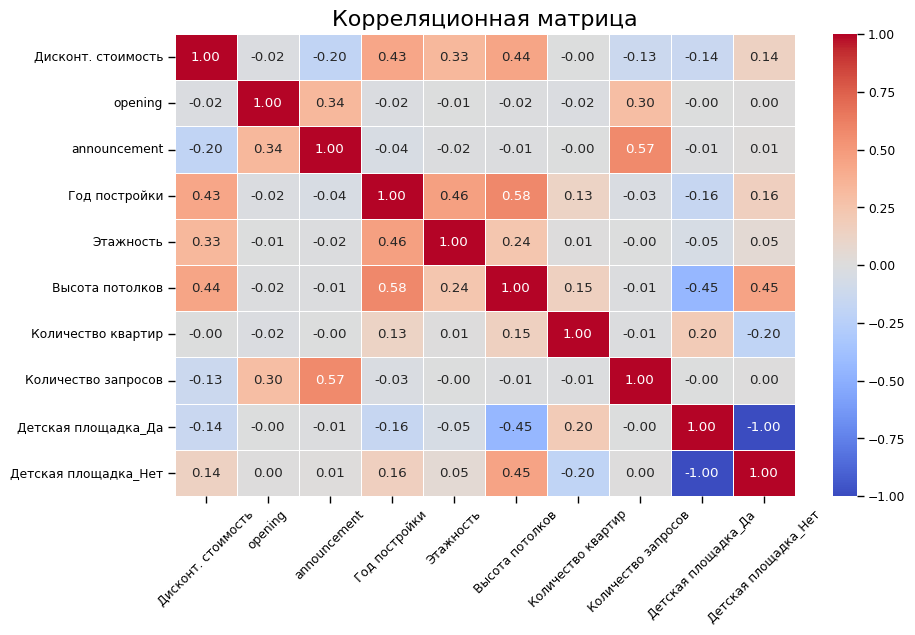

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_context("paper")
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
#plt.title("Корреляционная матрица", fontsize = 16)
plt.xticks(rotation=45)
plt.savefig("corr.png", dpi=300, bbox_inches='tight')  

plt.show()

In [24]:
corr_matrix['discounted_value'][abs(corr_matrix['discounted_value']) > 0.15].sort_values(ascending=False)


discounted_value                                 1.000000
Высота потолков                                  0.442014
Год постройки                                    0.430155
Тип дома_Монолитный                              0.414811
Этажность                                        0.330600
Количество лифтов_4 пассажирских, 2 грузовых     0.199468
Тип дома_Монолитно кирпичный                     0.181478
Количество лифтов_10 пассажирских, 8 грузовых    0.181478
Спортивная площадка_Да                           0.176439
Количество лифтов_5 пассажирских, 5 грузовых     0.170605
Тип дома_Кирпичный                              -0.173198
Спортивная площадка_Нет                         -0.176439
announcement                                    -0.195145
Количество лифтов_6 пассажирских                -0.213140
Name: discounted_value, dtype: float64

In [ ]:
corr_matrix["value"].sort_values(ascending=False)

## Diff-in-diff

In [194]:
merged_table = matched_data

In [188]:
matched_data

,value,reportDate,prettyValue,realty_id,Адрес,URL,Год.постройки,Этажность,Высота.потолков,Тип.перекрытий,...,Ближайшая.станция.до.тритмента.расстояние,Ближайшая.станция.до.тритмента,Сокращение.расстояния,cumprod,discounted_value,Number.of.queries,treatment,distance,weights,subclass
0,220493.0,2020-03-01,220 493 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,22,2.64,Другие,...,2370,Беляево,1489,1.0000,220493.000000,145,1,0.636455,1,1
1,228764.0,2020-04-01,228 764 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,22,2.64,Другие,...,2370,Беляево,1489,1.0000,228764.000000,104,1,0.636455,1,2
2,228764.0,2020-05-01,228 764 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,22,2.64,Другие,...,2370,Беляево,1489,1.0000,228764.000000,89,1,0.636455,1,3
3,239315.0,2020-06-01,239 315 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,22,2.64,Другие,...,2370,Беляево,1489,1.0508,227745.527217,140,1,0.636455,1,4
4,236383.0,2020-07-01,236 383 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,22,2.64,Другие,...,2370,Беляево,1489,1.0508,224955.272174,285,1,0.636455,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,230183.0,2024-09-01,230 183 ₽/м²,98,"Москва, улица Академика Варги, 18",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1976,16,2.48,Другие,...,1856,Тропарёво,350,1.6769,137266.980738,78510,0,0.568224,1,1403
2876,230183.0,2024-10-01,230 183 ₽/м²,98,"Москва, улица Академика Варги, 18",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1976,16,2.48,Другие,...,1856,Тропарёво,350,1.6769,137266.980738,19733,0,0.568224,1,1402
2877,237424.0,2024-11-01,237 424 ₽/м²,98,"Москва, улица Академика Варги, 18",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1976,16,2.48,Другие,...,1856,Тропарёво,350,1.6769,141585.067684,17202,0,0.568224,1,1401
2878,237424.0,2024-12-01,237 424 ₽/м²,98,"Москва, улица Академика Варги, 18",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1976,16,2.48,Другие,...,1856,Тропарёво,350,1.6248,146125.061546,38138,0,0.568224,1,1400


In [195]:
merged_table["log_discounted_value"] = np.log(merged_table["discounted_value"])
merged_table_grouped = merged_table.groupby(["treatment", "reportDate"])["log_discounted_value"].mean().reset_index()
merged_table_grouped['reportDate'] = pd.to_datetime(merged_table_grouped['reportDate'])
window_size = 1

In [196]:
queries = merged_table.groupby("reportDate")["Number.of.queries"].mean().reset_index()

In [197]:
queries['reportDate'] = pd.to_datetime(queries['reportDate'])
merged_table_grouped = merged_table_grouped.merge(queries, on = "reportDate")

In [ ]:
merged_table_grouped['smoothed_log_discounted_value'] = (
    merged_table_grouped.groupby('treatment')['log_discounted_value']
    .transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())
)

# Создание графика
plt.figure(figsize=(10, 6))

# Строим линии с учетом сглаженных данных
sns.lineplot(data=merged_table_grouped, x='reportDate', y='smoothed_log_discounted_value', hue='treatment')

# Добавляем вертикальную линию, убедившись, что дата в правильном формате
plt.axvline(x=pd.Timestamp("2024-09-01"), color='red', linestyle='dashed')

# Настройки графика
plt.xlabel('Time')
plt.ylabel('Smoothed Outcome')
plt.title('Comparison of Smoothed Outcomes Over Time')
plt.legend(title='Label')
plt.grid(True)
plt.savefig("pretrend", dpi=300)
# Отображаем график
plt.show()

In [ ]:
merged_table_grouped

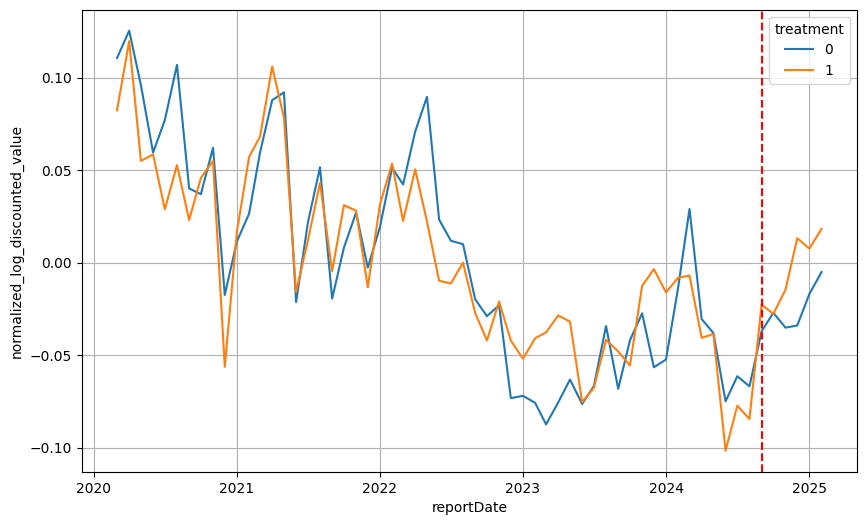

In [198]:
merged_table_grouped['normalized_log_discounted_value'] = (
    merged_table_grouped.groupby('treatment')['log_discounted_value']
    .transform(lambda x: x - x.mean())
)

# merged_table_grouped['smoothed_normalized_value'] = (
#     merged_table_grouped.groupby('treatment')['normalized_log_discounted_value']
#     .transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())
# )

plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_table_grouped, x='reportDate', y='normalized_log_discounted_value', hue='treatment')
plt.axvline(x=pd.Timestamp("2024-09-01"), color='red', linestyle='dashed', label='Intervention Date')
plt.grid(True)
plt.savefig("pretrend_normalized.png", dpi=300)
plt.show()


In [165]:
merged_table

,value,reportDate,prettyValue,realty_id,Адрес,URL,Год.постройки,Этажность,Высота.потолков,Тип.перекрытий,...,Ближайшая.станция.до.тритмента.расстояние,Ближайшая.станция.до.тритмента,Сокращение.расстояния,cumprod,discounted_value,Number.of.queries,treatment,weights,subclass,log_discounted_value
0,220493.0,2020-03-01,220 493 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,22,2.64,Другие,...,2370,Беляево,1489,1.0000,220493.000000,145,1,1,1,12.303621
1,228764.0,2020-04-01,228 764 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,22,2.64,Другие,...,2370,Беляево,1489,1.0000,228764.000000,104,1,1,2,12.340446
2,228764.0,2020-05-01,228 764 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,22,2.64,Другие,...,2370,Беляево,1489,1.0000,228764.000000,89,1,1,3,12.340446
3,239315.0,2020-06-01,239 315 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,22,2.64,Другие,...,2370,Беляево,1489,1.0508,227745.527217,140,1,1,4,12.335984
4,236383.0,2020-07-01,236 383 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,22,2.64,Другие,...,2370,Беляево,1489,1.0508,224955.272174,285,1,1,5,12.323657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3815,333333.0,2024-06-01,333 333 ₽/м²,99,"Москва, улица Академика Арцимовича, 2К2",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1967,9,2.50,Железобетонные,...,1050,Беляево,387,1.7547,189965.806121,21350,0,1,1722,12.154599
3816,333333.0,2024-07-01,333 333 ₽/м²,99,"Москва, улица Академика Арцимовича, 2К2",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1967,9,2.50,Железобетонные,...,1050,Беляево,387,1.7547,189965.806121,14210,0,1,1723,12.154599
3817,322222.0,2024-08-01,322 222 ₽/м²,99,"Москва, улица Академика Арцимовича, 2К2",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1967,9,2.50,Железобетонные,...,1050,Беляево,387,1.7547,183633.669573,28204,0,1,1724,12.120698
3818,322222.0,2024-09-01,322 222 ₽/м²,99,"Москва, улица Академика Арцимовича, 2К2",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1967,9,2.50,Железобетонные,...,1050,Беляево,387,1.6769,192153.378257,78510,0,1,1725,12.166049


In [185]:

# Загрузим данные
merged_table['post'] = (merged_table['reportDate'] > '2024-09-01').astype(int)
merged_table['reportDate'] = pd.to_datetime(merged_table['reportDate'])

df_pre = merged_table[merged_table["post"] == 0]

# Создаем новую переменную времени для удобства
df_pre["time"] = (df_pre["reportDate"] - df_pre["reportDate"].min()).dt.days

# Строим регрессию для проверки параллельных трендов
model = smf.ols("log_discounted_value ~ time * treatment + Квартир + Этажность", data=df_pre).fit()

# Вывод результатов
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     log_discounted_value   R-squared:                       0.265
Model:                              OLS   Adj. R-squared:                  0.264
Method:                   Least Squares   F-statistic:                     216.4
Date:                  Tue, 11 Mar 2025   Prob (F-statistic):          1.40e-197
Time:                          16:12:40   Log-Likelihood:                 1462.3
No. Observations:                  3007   AIC:                            -2913.
Df Residuals:                      3001   BIC:                            -2877.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.971

/var/folders/pd/y6gz7fv57txdrm0b2vy7xw040000gn/T/ipykernel_46814/2967382186.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre["time"] = (df_pre["reportDate"] - df_pre["reportDate"].min()).dt.days


In [164]:
df_pre

,value,reportDate,prettyValue,realty_id,Адрес,URL,Год.постройки,Этажность,Высота.потолков,Тип.перекрытий,...,Ближайшая.станция.до.тритмента,Сокращение.расстояния,cumprod,discounted_value,Number.of.queries,treatment,weights,subclass,log_discounted_value,time
42,174888.0,2020-07-01,174 888 ₽/м²,2,"Москва, улица Бутлерова, 2К1",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1967,9,2.5,Железобетонные,...,Калужская,14,1.6248,107636.632201,285,0,1,1601,11.586516,122
43,207106.0,2020-08-01,207 106 ₽/м²,2,"Москва, улица Бутлерова, 2К1",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1967,9,2.5,Железобетонные,...,Калужская,14,1.6248,127465.534220,231,0,1,1602,11.755601,153
44,233959.0,2020-09-01,233 959 ₽/м²,2,"Москва, улица Бутлерова, 2К1",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1967,9,2.5,Железобетонные,...,Калужская,14,1.1582,202002.244863,165,0,1,1603,12.216034,184
45,213435.0,2020-10-01,213 435 ₽/м²,2,"Москва, улица Бутлерова, 2К1",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1967,9,2.5,Железобетонные,...,Калужская,14,1.1582,184281.643930,171,0,1,1604,12.124221,214
46,212375.0,2020-11-01,212 375 ₽/м²,2,"Москва, улица Бутлерова, 2К1",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1967,9,2.5,Железобетонные,...,Калужская,14,1.1582,183366.430668,1252,0,1,1605,12.119242,245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3815,333333.0,2024-06-01,333 333 ₽/м²,99,"Москва, улица Академика Арцимовича, 2К2",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1967,9,2.5,Железобетонные,...,Беляево,387,1.7547,189965.806121,21350,0,1,1722,12.154599,1553
3816,333333.0,2024-07-01,333 333 ₽/м²,99,"Москва, улица Академика Арцимовича, 2К2",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1967,9,2.5,Железобетонные,...,Беляево,387,1.7547,189965.806121,14210,0,1,1723,12.154599,1583
3817,322222.0,2024-08-01,322 222 ₽/м²,99,"Москва, улица Академика Арцимовича, 2К2",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1967,9,2.5,Железобетонные,...,Беляево,387,1.7547,183633.669573,28204,0,1,1724,12.120698,1614
3818,322222.0,2024-09-01,322 222 ₽/м²,99,"Москва, улица Академика Арцимовича, 2К2",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1967,9,2.5,Железобетонные,...,Беляево,387,1.6769,192153.378257,78510,0,1,1725,12.166049,1645


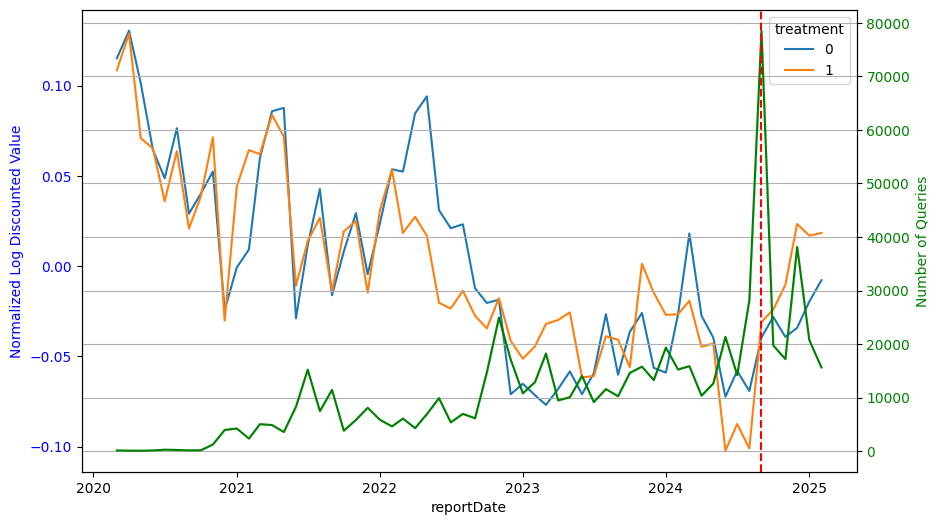

In [129]:
plt.figure(figsize=(10, 6))

# Создаем основную ось (ось слева)
ax1 = plt.gca()  # Получаем текущую ось
sns.lineplot(data=merged_table_grouped, x='reportDate', y='normalized_log_discounted_value', hue='treatment', ax=ax1)
ax1.set_ylabel("Normalized Log Discounted Value", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Создаем вторую ось (ось справа)
ax2 = ax1.twinx()  # Создаем вторую ось Y
sns.lineplot(data=merged_table_grouped, x='reportDate', y='Number.of.queries', color='green', ax=ax2)
ax2.set_ylabel("Number of Queries", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Вертикальная линия для события
plt.axvline(x=pd.Timestamp("2024-09-01"), color='red', linestyle='dashed', label='Intervention Date')
plt.grid(True)

# Сохраняем график
plt.savefig("pretrend_normalized_dual_axis.png", dpi=300)
plt.show()


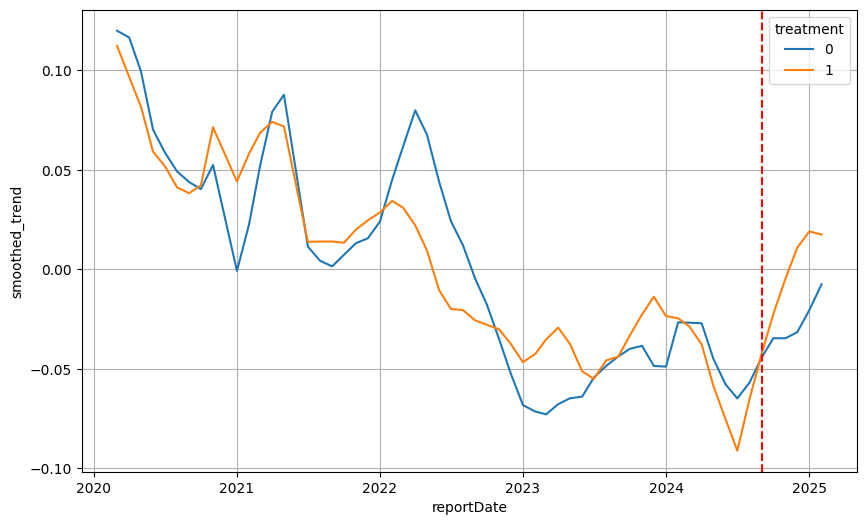

In [130]:
import numpy as np
import statsmodels.api as sm

# Применяем LOWESS сглаживание (frac - степень сглаживания)
lowess_frac = 0.07  # Чем больше, тем плавнее линия
for treatment_group in merged_table_grouped['treatment'].unique():
    subset = merged_table_grouped[merged_table_grouped['treatment'] == treatment_group]
    smoothed_values = sm.nonparametric.lowess(subset['normalized_log_discounted_value'], subset['reportDate'], frac=lowess_frac, return_sorted=False)
    merged_table_grouped.loc[merged_table_grouped['treatment'] == treatment_group, 'smoothed_trend'] = smoothed_values

plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_table_grouped, x='reportDate', y='smoothed_trend', hue='treatment')

plt.axvline(x=pd.Timestamp("2024-09-01"), color='red', linestyle='dashed', label='Intervention Date')
plt.grid(True)
plt.savefig("pretrend_lowess.png", dpi=300)
plt.show()


In [ ]:

ratio_df = merged_table_grouped.pivot(index='reportDate', columns='treatment', values='log_discounted_value')
ratio_df['ratio'] = ratio_df[1] / ratio_df[0]

ratio_df['smoothed_ratio'] = ratio_df['ratio'].rolling(window=window_size, min_periods=1).mean()

# Создание графика
plt.figure(figsize=(10, 6))

# Строим линию соотношения
sns.lineplot(data=ratio_df, x=ratio_df.index, y='smoothed_ratio', color='blue')

# Добавляем вертикальную линию
plt.axvline(x=pd.Timestamp("2024-09-01"), color='red', linestyle='dashed')

# Настройки графика
plt.xlabel('Time')
plt.ylabel('Ratio (Group 1 / Group 0)')
plt.title('Ratio of Group 1 to Group 0 Over Time')
plt.grid(True)
plt.savefig("pretrends2", dpi=300)
# Отображаем график
plt.show()


In [15]:
import statsmodels.formula.api as smf

# Фильтруем только данные до интервенции
df_pre = merged_table_grouped[merged_table_grouped['reportDate'] < pd.Timestamp("2024-09-01")].copy()

# Создаем числовой индекс времени
df_pre['time_num'] = (df_pre['reportDate'] - df_pre['reportDate'].min()).dt.days

# Строим регрессию: проверяем, есть ли взаимодействие между временем и treatment
model = smf.ols("log_discounted_value ~ time_num * treatment", data=df_pre).fit()

print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     log_discounted_value   R-squared:                       0.753
Model:                              OLS   Adj. R-squared:                  0.746
Method:                   Least Squares   F-statistic:                     105.8
Date:                  Sun, 09 Mar 2025   Prob (F-statistic):           1.81e-31
Time:                          06:54:57   Log-Likelihood:                 214.94
No. Observations:                   108   AIC:                            -421.9
Df Residuals:                       104   BIC:                            -411.2
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept       

## Wordstat

In [68]:
queries_2 = pd.read_csv("wordstat_dynamic_feb.csv", sep=";").iloc[:, :2]

In [69]:
queries_2

,Period,Number of queries
0,марта 2020,145
1,апреля 2020,104
2,мая 2020,89
3,июня 2020,140
4,июля 2020,285
5,августа 2020,231
6,сентября 2020,165
7,октября 2020,171
8,ноября 2020,1252
9,декабря 2020,3965


In [70]:
queries = pd.read_csv("wordstat_dynamic_feb.csv", sep=";").iloc[:, :2]
queries["Number of queries"] = (
    queries["Number of queries"]
    .astype(str)       # Преобразуем в строку (на всякий случай)
    .str.replace(" ", "")  # Убираем все пробелы
    .astype(float)     # Преобразуем обратно в float
)

queries["Period"] = pd.to_datetime(queries["Period"]).dt.date

queries.rename(columns={"Period":"reportDate"}, inplace=True)

queries

/var/folders/pd/y6gz7fv57txdrm0b2vy7xw040000gn/T/ipykernel_46814/1201439762.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  queries["Period"] = pd.to_datetime(queries["Period"]).dt.date


,reportDate,Number of queries
0,2020-03-01,145.0
1,2020-04-01,104.0
2,2020-05-01,89.0
3,2020-06-01,140.0
4,2020-07-01,285.0
5,2020-08-01,231.0
6,2020-09-01,165.0
7,2020-10-01,171.0
8,2020-11-01,1252.0
9,2020-12-01,3965.0


In [15]:
queries.head()

,reportDate,Number of queries,"Percentage of total queries, %"
0,2020-03-01,145.0,"0,00000148"
1,2020-04-01,104.0,"0,00000087"
2,2020-05-01,89.0,"0,00000083"
3,2020-06-01,140.0,"0,00000157"
4,2020-07-01,285.0,"0,00000340"


In [ ]:
# fig, ax = plt.subplots(figsize=(10, 5))

# ax.plot(queries["Period"], queries["Number of queries"])
# plt.show()

In [89]:
merged_table["reportDate"] = pd.to_datetime(merged_table["reportDate"])
queries["reportDate"] = pd.to_datetime(queries["reportDate"])

merged_table = merged_table.merge(queries[["reportDate", "Number of queries"]], on ="reportDate", how="left")
merged_table.reportDate = merged_table.reportDate.dt.date

In [96]:
merged_table.columns

Index(['value', 'reportDate', 'prettyValue', 'realty_id', 'Адрес', 'URL',
       'Год постройки', 'Тип дома', 'Этажность', 'Строительная серия',
       'Высота потолков', 'Газоснабжение', 'Отопление', 'Тип перекрытий',
       'Подъездов', 'Количество лифтов', 'Мусоропроводов', 'Квартир',
       'Реновация', 'Аварийность', 'Детская площадка', 'Спортивная площадка',
       'Фонд капитального ремонта', 'Расстояние до первой станции',
       'Расстояние до второй станции', 'Расстояние до третьей станции',
       'Название первой станции', 'Название второй станции',
       'Название третьей станции',
       'Ближайшая станция после тритмента расстояние',
       'Ближайшая станция после тритмента',
       'Ближайшая станция до тритмента расстояние',
       'Ближайшая станция до тритмента', 'Сокращение расстояния', 'cumprod',
       'discounted_value', 'Number of queries'],
      dtype='object')

In [95]:
merged_table.rename(columns = {"Number of queries_y" : "Number of queries"}, inplace = True)

In [98]:
merged_table.shape

(4395, 37)

In [92]:
merged_table.drop(columns = ["Number of queries_x"], inplace = True)
merged_table.rename(columns = {"Number of queries_x" : "Number of queries"})

,value,reportDate,prettyValue,realty_id,Адрес,URL,Год постройки,Тип дома,Этажность,Строительная серия,...,Название второй станции,Название третьей станции,Ближайшая станция после тритмента расстояние,Ближайшая станция после тритмента,Ближайшая станция до тритмента расстояние,Ближайшая станция до тритмента,Сокращение расстояния,cumprod,discounted_value,Number of queries_y
0,220493.0,2020-03-01,220 493 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,Беляево,Тропарёво,881.0,Университет Дружбы Народов,2370.0,Беляево,1489.0,1.0000,220493.000000,145.0
1,228764.0,2020-04-01,228 764 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,Беляево,Тропарёво,881.0,Университет Дружбы Народов,2370.0,Беляево,1489.0,1.0000,228764.000000,104.0
2,228764.0,2020-05-01,228 764 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,Беляево,Тропарёво,881.0,Университет Дружбы Народов,2370.0,Беляево,1489.0,1.0000,228764.000000,89.0
3,239315.0,2020-06-01,239 315 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,Беляево,Тропарёво,881.0,Университет Дружбы Народов,2370.0,Беляево,1489.0,1.0508,227745.527217,140.0
4,236383.0,2020-07-01,236 383 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,Беляево,Тропарёво,881.0,Университет Дружбы Народов,2370.0,Беляево,1489.0,1.0508,224955.272174,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4390,333333.0,2024-06-01,333 333 ₽/м²,99,"Москва, улица Академика Арцимовича, 2К2",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1967,Панельный,9,1605-АМ,...,Беляево,Коньково,663.0,Университет Дружбы Народов,1050.0,Беляево,387.0,1.7547,189965.806121,21350.0
4391,333333.0,2024-07-01,333 333 ₽/м²,99,"Москва, улица Академика Арцимовича, 2К2",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1967,Панельный,9,1605-АМ,...,Беляево,Коньково,663.0,Университет Дружбы Народов,1050.0,Беляево,387.0,1.7547,189965.806121,14210.0
4392,322222.0,2024-08-01,322 222 ₽/м²,99,"Москва, улица Академика Арцимовича, 2К2",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1967,Панельный,9,1605-АМ,...,Беляево,Коньково,663.0,Университет Дружбы Народов,1050.0,Беляево,387.0,1.7547,183633.669573,28204.0
4393,322222.0,2024-09-01,322 222 ₽/м²,99,"Москва, улица Академика Арцимовича, 2К2",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1967,Панельный,9,1605-АМ,...,Беляево,Коньково,663.0,Университет Дружбы Народов,1050.0,Беляево,387.0,1.6769,192153.378257,78510.0


In [99]:
merged_table.to_csv("merged_table.csv", index=False)

## Real Estate index

In [133]:
df = pd.read_csv("real_estate_index2.csv", sep=";")
df = df.iloc[:, :4]

In [142]:
df.head()

,reportDate,Quarter,index,cumprod
0,2020-03-01,I квартал,"100,","1,"
1,2020-06-01,II квартал,"105,08","1,0508"
2,2020-09-01,III квартал,"110,22","1,1582"
3,2020-12-01,IV квартал,"108,54","1,2571"
4,2021-03-01,I квартал,"100,37","1,2618"


In [134]:
df["cumprod"] = df["cumprod"].astype(str).str.replace(",", ".").astype(float)
df["index"] = df["index"].astype(str).str.replace(",", ".").astype(float)

df["index"] = df["index"].astype(float)/100
# df["reportDate"] = pd.to_datetime(df["reportDate"]).dt.strftime('%Y-%m-%d')
# df["reportDate"] = pd.to_datetime(df["reportDate"], format="%Y-%d-%m").dt.strftime("%Y-%m-%d")

In [144]:
merged_table["reportDate"] = pd.to_datetime(merged_table["reportDate"])
df["reportDate"] = pd.to_datetime(df["reportDate"])

merged_table = merged_table.merge(df[["reportDate", "cumprod"]], on ="reportDate", how="left")
merged_table.reportDate = merged_table.reportDate.dt.strftime('%Y-%m-%d')

In [145]:
merged_table["cumprod"] = merged_table["cumprod"].ffill().bfill()

In [146]:
merged_table["discounted_value"] = merged_table["value"] / merged_table["cumprod"]

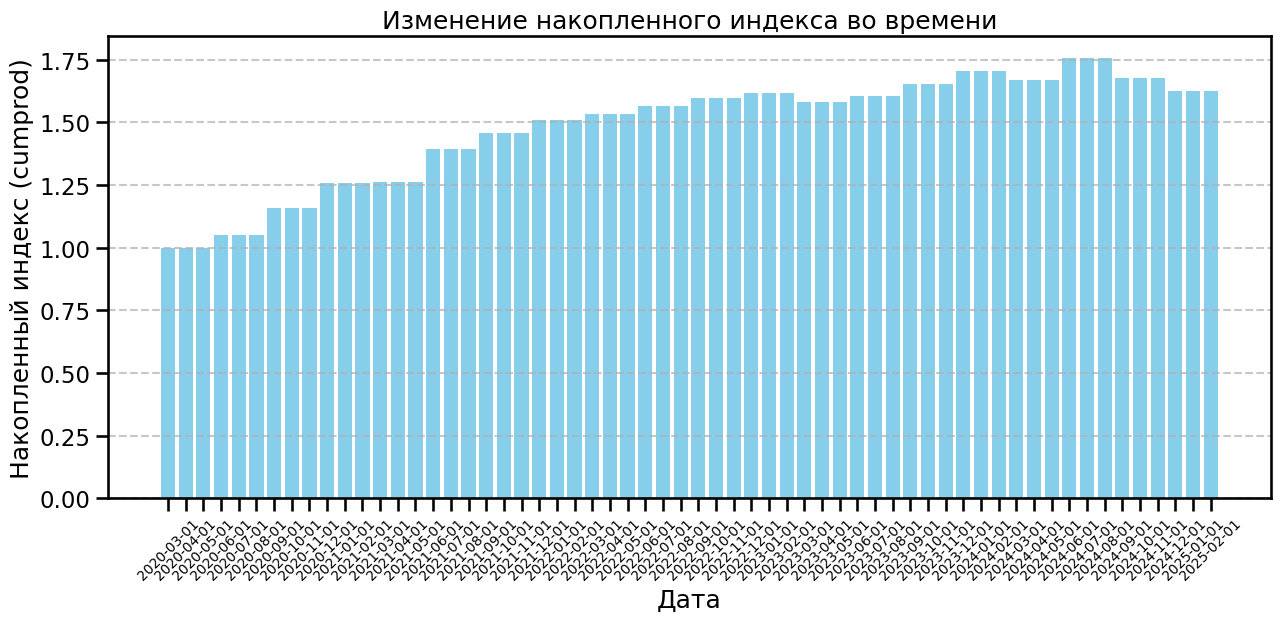

In [59]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))  # Устанавливаем размер графика

# Строим столбчатую диаграмму
plt.bar(merged_table["reportDate"], merged_table["cumprod_y"], color="skyblue")

# # Форматируем ось X, чтобы даты отображались правильно
# plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Автоматический интервал для дат
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))  # Формат YYYY-MM

# Дополнительные настройки
plt.xticks(rotation=45, fontsize=10)  # Поворачиваем подписи на оси X для удобства
plt.xlabel("Дата")
plt.ylabel("Накопленный индекс (cumprod)")
plt.title("Изменение накопленного индекса во времени")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("index", dpi=300)
plt.show()


## Парсинг

1 - 45 Университет Дружбы народов

46 - 69 Генерала Тюленева

70 - 91 Генерала Тюленева + Тютчевская

92 - Потапово

In [ ]:
urls_prices = [
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1697035&roomsCount=all&period=all", 
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=34441&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=56706&roomsCount=all&period=all",        
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=18008&roomsCount=all&period=all",                
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=56710&roomsCount=all&period=all",        
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=71098&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=47492&roomsCount=all&period=all",     
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=989953&roomsCount=all&period=all",    
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=71097&roomsCount=all&period=all",  
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=71099&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=3245139&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=18007&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=58805&roomsCount=all&period=all",                  
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1080888&roomsCount=all&period=all",            
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=56705&roomsCount=all&period=all", 
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=47490&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=18000&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=17997&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=606455&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1701671&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=17998&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=32592&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=58801&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1711316&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=58806&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=58795&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1695695&roomsCount=all&period=all",    
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=18013&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79556&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79557&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1713733&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1715736&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1704699&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79567&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79561&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79525&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79570&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79569&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79572&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79539&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1703841&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1696643&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=17957&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1715434&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=17956&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1724532&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1703284&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1695949&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1700137&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1781723&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=606384&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=17945&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1691421&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=41145&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1702798&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1713741&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1695987&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=41147&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79549&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79540&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79533&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79548&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79547&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79545&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=41159&roomsCount=all&period=all",
    #"https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1847202&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1803888&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1833802&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1873062&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1807554&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1864728&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1813861&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1096058&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1769520&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1870385&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=18009&roomsCount=all&period=all",
    #"https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=32599&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=17996&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=58813&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1707726&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=56654&roomsCount=all&period=all",
    #"https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=972356&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1850461&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1848324&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1846881&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1869028&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1873180&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1893398&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1831914&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=41162&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79514&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79515&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1768971&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=41157&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79562&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1803178&roomsCount=all&period=all",
    #"https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79567&roomsCount=oneRoom&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79528&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1697086&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=32593&roomsCount=all&period=all",

    
    ]

In [79]:

"https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=58801&roomsCount=all&period=all" in urls_prices

True

In [ ]:
urls_house_info = [
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B+%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C+6&totalArea=38.4&roomsCount=1&offerId=309089270&floor=floorOther&repairType=repairTypeDesign",                                                                                   
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%91%D1%83%D1%82%D0%BB%D0%B5%D1%80%D0%BE%D0%B2%D0%B0%2C+2%D0%9A1&totalArea=60.0&roomsCount=3&offerId=311850058&floor=floorOther&repairType=repairTypeDesign",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C+28%D0%9A3&totalArea=52.5&roomsCount=3&offerId=307635407&floor=floorOther&repairType=repairTypeWithout",                                                                                                       
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C+25%D0%9A1&totalArea=33.0&roomsCount=1&offerId=307458577&floor=floorOther&repairType=repairTypeWithout",                                                              
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C+28%D0%9A7&totalArea=75.9&roomsCount=3&offerId=310793059&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B+%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C+4%D0%9A3&totalArea=81.1&roomsCount=3&offerId=309936581&floor=floorOne&repairType=repairTypeWithout",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%9C%D0%B8%D0%BA%D0%BB%D1%83%D1%85%D0%BE-%D0%9C%D0%B0%D0%BA%D0%BB%D0%B0%D1%8F+%D1%83%D0%BB%D0%B8%D1%86%D0%B0%2C+27%D0%9A1&totalArea=73.8&roomsCount=3&offerId=308129789&floor=floorOther&repairType=repairTypeWithout",                                               
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B+%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C+8%D0%BA3&totalArea=58.0&roomsCount=2&offerId=309527570&floor=floorOther&repairType=repairTypeWithout",                                                                         
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B+%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C+4%D0%9A2&totalArea=79.5&roomsCount=3&offerId=309254865&floor=floorOther&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B+%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C+4%D0%9A4&totalArea=55.2&roomsCount=2&offerId=308290049&floor=floorLast&repairType=repairTypeDesign",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B+%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C+2%D0%90&totalArea=120.0&roomsCount=3&offerId=309980787&floor=floorOther&repairType=repairTypeDesign",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C+23%D0%9A1&totalArea=60.0&roomsCount=3&offerId=306765780&floor=floorOne&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C+9%D0%9A4&totalArea=39.0&roomsCount=1&offerId=307912564&floor=floorLast&repairType=repairTypeEuro",                                                     
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C+28%D0%BA6&totalArea=41.0&roomsCount=1&offerId=311945204&floor=floorOther&repairType=repairTypeEuro",                                                                                     
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C+28%D0%9A2&totalArea=71.6&roomsCount=4&offerId=311912659&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%9C%D0%B8%D0%BA%D0%BB%D1%83%D1%85%D0%BE-%D0%9C%D0%B0%D0%BA%D0%BB%D0%B0%D1%8F+%D1%83%D0%BB%D0%B8%D1%86%D0%B0%2C+25&totalArea=38.7&roomsCount=1&offerId=310270512&floor=floorLast&repairType=repairTypeDesign",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C+15%D0%9A3&totalArea=66.4&roomsCount=3&offerId=311328806&floor=floorOther&repairType=repairTypeWithout",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C+15%D0%9A1&totalArea=63.0&roomsCount=3&offerId=300302109&floor=floorOther&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C+8%D0%90&totalArea=95.1&roomsCount=3&offerId=311908456&floor=floorTwo&repairType=repairTypeDesign",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C+13&totalArea=45.3&roomsCount=2&offerId=307780981&floor=floorOther&repairType=repairTypeWithout",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C+15%D0%9A2&totalArea=45.0&roomsCount=2&offerId=299209036&floor=floorTwo&repairType=repairTypeWithout",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%90%D1%80%D1%86%D0%B8%D0%BC%D0%BE%D0%B2%D0%B8%D1%87%D0%B0%2C+2%D0%9A1&totalArea=40.0&roomsCount=1&offerId=309589901&floor=floorTwo&repairType=repairTypeDesign",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C+9%D0%9A1&totalArea=52.5&roomsCount=1&offerId=308770205&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%90%D1%80%D1%86%D0%B8%D0%BC%D0%BE%D0%B2%D0%B8%D1%87%D0%B0%2C+8&totalArea=45.8&roomsCount=2&offerId=311262176&floor=floorLast&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C+9%D0%9A5&totalArea=120.0&roomsCount=3&offerId=303870632&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C+5%D0%9A3&totalArea=51.0&roomsCount=1&offerId=311125656&floor=floorOther&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C+9&totalArea=66.6&roomsCount=2&offerId=311234104&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C+31%D0%9A2&totalArea=64.0&roomsCount=3&offerId=310639393&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+21%D0%9A1&totalArea=75.0&roomsCount=3&offerId=303230896&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+21%D0%9A2&totalArea=26.0&roomsCount=1&offerId=308076419&floor=floorOther&repairType=repairTypeWithout",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+4&totalArea=50.6&roomsCount=2&offerId=310662654&floor=floorOther&repairType=repairTypeWithout",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+8&totalArea=59.0&roomsCount=3&offerId=310505447&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+23&totalArea=36.8&roomsCount=1&offerId=311772311&floor=floorLast&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+25%D0%9A1&totalArea=37.6&roomsCount=1&offerId=310947195&floor=floorLast&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+21%D0%9A5&totalArea=45.2&roomsCount=2&offerId=312120809&floor=floorOther&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+12%D0%9A1&totalArea=38.5&roomsCount=2&offerId=310625201&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+25%D0%9A5&totalArea=45.0&roomsCount=2&offerId=308637655&floor=floorOther&repairType=repairTypeDesign",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+25%D0%9A4&totalArea=62.0&roomsCount=3&offerId=288824068&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+27&totalArea=54.0&roomsCount=2&offerId=311120890&floor=floorLast&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+14%2F2&totalArea=44.4&roomsCount=2&offerId=301200222&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C+5&totalArea=76.2&roomsCount=4&offerId=308144018&floor=floorOne&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C+3&totalArea=60.8&roomsCount=3&offerId=302971287&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%B8%D0%BD%D0%BE%D0%B3%D1%80%D0%B0%D0%B4%D0%BE%D0%B2%D0%B0%2C+4%D0%9A2&totalArea=40.0&roomsCount=2&offerId=310967629&floor=floorOther",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%B8%D0%BD%D0%BE%D0%B3%D1%80%D0%B0%D0%B4%D0%BE%D0%B2%D0%B0%2C+6&totalArea=60.0&roomsCount=3&offerId=308397152&floor=floorOther&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%B8%D0%BD%D0%BE%D0%B3%D1%80%D0%B0%D0%B4%D0%BE%D0%B2%D0%B0%2C+4%D0%9A1&totalArea=34.1&roomsCount=1&offerId=305930485&floor=floorOne&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%B8%D0%BD%D0%BE%D0%B3%D1%80%D0%B0%D0%B4%D0%BE%D0%B2%D0%B0%2C+12&totalArea=50.8&roomsCount=2&offerId=304858455&floor=floorOther&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%B8%D0%BD%D0%BE%D0%B3%D1%80%D0%B0%D0%B4%D0%BE%D0%B2%D0%B0%2C+1&totalArea=102.2&roomsCount=3&offerId=311371966&floor=floorOther&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C+6&totalArea=45.2&roomsCount=2&offerId=308908363&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C+2&totalArea=32.5&roomsCount=1&offerId=312295732&floor=floorOne&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C+8&totalArea=65.6&roomsCount=3&offerId=312454781&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C+28&totalArea=32.6&roomsCount=1&offerId=307775309&floor=floorOther&repairType=repairTypeDesign",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C+36&totalArea=73.4&roomsCount=3&offerId=311208660&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0+%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C+11&totalArea=64.0&roomsCount=3&offerId=310743428&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0+%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C+7%D0%9A1&totalArea=61.0&roomsCount=3&offerId=311126074&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0+%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C+13&totalArea=68.0&roomsCount=3&offerId=304856437&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0+%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C+15&totalArea=51.3&roomsCount=2&offerId=311160192&floor=floorOther&repairType=repairTypeWithout",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0+%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C+17&totalArea=51.0&roomsCount=2&offerId=302404390&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0+%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C+7%D0%9A2&totalArea=34.7&roomsCount=1&offerId=308231609&floor=floorTwo&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+15%D0%9A7&totalArea=52.0&roomsCount=2&offerId=309113077&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+15%D0%9A1&totalArea=63.5&roomsCount=2&offerId=301855337&floor=floorOther&repairType=repairTypeWithout",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+13%D0%9A1&totalArea=58.8&roomsCount=2&offerId=308746096&floor=floorOther&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+15%D0%9A6&totalArea=51.5&roomsCount=2&offerId=309117903&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+15%D0%9A5&totalArea=61.5&roomsCount=3&offerId=294319016&floor=floorOther&repairType=repairTypeWithout",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+15%D0%9A4&totalArea=34.8&roomsCount=1&offerId=312464277&floor=floorOne&repairType=repairTypeDesign",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0+%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C+25&totalArea=51.5&roomsCount=2&offerId=309890288&floor=floorOther&repairType=repairTypeCosmetic",
    #"https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%BF%D0%BE%D1%81.+%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0+%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%93%D0%B5%D1%80%D0%BE%D1%8F+%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8+%D0%A1%D0%BE%D0%BB%D0%BE%D0%BC%D0%B0%D1%82%D0%B8%D0%BD%D0%B0%2C+1&totalArea=67.4&roomsCount=2&offerId=309636118&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%BF%D0%BE%D1%81.+%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0+%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%93%D0%B5%D1%80%D0%BE%D1%8F+%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8+%D0%A1%D0%BE%D0%BB%D0%BE%D0%BC%D0%B0%D1%82%D0%B8%D0%BD%D0%B0%2C+18&totalArea=50.5&roomsCount=1&offerId=310314749&floor=floorTwo&repairType=repairTypeWithout",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%BF%D0%BE%D1%81.+%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0+%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C+35&totalArea=54.0&roomsCount=1&offerId=312231467&floor=floorTwo&repairType=repairTypeDesign",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%BF%D0%BE%D1%81.+%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0+%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C+31&totalArea=44.9&roomsCount=2&offerId=308567781&floor=floorOther&repairType=repairTypeWithout",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%BF%D0%BE%D1%81.+%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0+%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C+33&totalArea=51.4&roomsCount=2&offerId=303243667&floor=floorOther&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%BF%D0%BE%D1%81.+%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0+%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C+28&totalArea=33.3&roomsCount=1&offerId=307890576&floor=floorTwo&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%BF%D0%BE%D1%81.+%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0+%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C+29&totalArea=33.9&roomsCount=1&offerId=311586464&floor=floorOther&repairType=repairTypeWithout",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%9E%D0%BF%D0%B0%D1%80%D0%B8%D0%BD%D0%B0%2C+4%D0%BA1&totalArea=54.0&roomsCount=1&offerId=313034357&floor=floorOther&repairType=repairTypeDesign",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C+19&totalArea=65.0&roomsCount=3&offerId=312577524&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C+17&totalArea=36.0&roomsCount=1&offerId=313352960&floor=floorOther&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C+25%D0%9A2&totalArea=64.0&roomsCount=3&offerId=313715861&floor=floorOther&repairType=repairTypeCosmetic",
    #"https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%90%D1%80%D1%86%D0%B8%D0%BC%D0%BE%D0%B2%D0%B8%D1%87%D0%B0%2C+5%D0%9A1&totalArea=41.8&roomsCount=2&offerId=313486539&floor=floorOther&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C+14%D0%9A3&totalArea=75.6&roomsCount=3&offerId=307390635&floor=floorOther&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C+11%D0%9A1&totalArea=120.0&roomsCount=4&offerId=303619557&floor=floorOther&repairType=repairTypeDesign",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C+18&totalArea=70.3&roomsCount=4&offerId=312890563&floor=floorOther",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C+4%D0%9A1&totalArea=44.6&roomsCount=2&offerId=303885699&floor=floorOther&repairType=repairTypeCosmetic",
    #"https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%9B%D0%B5%D0%BD%D0%B8%D0%BD%D1%81%D0%BA%D0%B8%D0%B9+%D0%BF%D1%80%D0%BE%D1%81%D0%BF%D0%B5%D0%BA%D1%82%2C+111%D0%BA1&totalArea=161.1&roomsCount=3&offerId=302152670&floor=floorOther&repairType=repairTypeDesign",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%BF%D0%BE%D1%81.+%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0+%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%93%D0%B5%D1%80%D0%BE%D1%8F+%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8+%D0%A1%D0%BE%D0%BB%D0%BE%D0%BC%D0%B0%D1%82%D0%B8%D0%BD%D0%B0%2C+17&totalArea=67.3&roomsCount=3&offerId=312621729&floor=floorOther&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%BF%D0%BE%D1%81.+%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0+%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%93%D0%B5%D1%80%D0%BE%D1%8F+%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8+%D0%A1%D0%BE%D0%BB%D0%BE%D0%BC%D0%B0%D1%82%D0%B8%D0%BD%D0%B0%2C+7&totalArea=47.1&roomsCount=2&offerId=313145420&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%BF%D0%BE%D1%81.+%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0+%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%93%D0%B5%D1%80%D0%BE%D1%8F+%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8+%D0%A1%D0%BE%D0%BB%D0%BE%D0%BC%D0%B0%D1%82%D0%B8%D0%BD%D0%B0%2C+5&totalArea=60.0&roomsCount=3&offerId=312946294&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%BF%D0%BE%D1%81.+%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0+%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C+%D0%BF%D1%80%D0%BE%D0%B5%D0%B7%D0%B4+%D0%9C%D1%83%D0%B7%D1%8B%D0%BA%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9%2C+2&totalArea=63.0&roomsCount=3&offerId=309757665&floor=floorOne&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%BF%D0%BE%D1%81.+%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0+%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C+24&totalArea=64.1&roomsCount=3&offerId=313274507&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%BF%D0%BE%D1%81.+%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0+%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C+16&totalArea=33.2&roomsCount=1&offerId=302189887&floor=floorOne&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%BF%D0%BE%D1%81.+%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0+%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C+15&totalArea=60.3&roomsCount=3&offerId=309818928&floor=floorLast&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0+%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C+27&totalArea=52.1&roomsCount=2&offerId=302329954&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+9%D0%9A6&totalArea=60.1&roomsCount=3&offerId=312759234&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+9%D0%9A7&totalArea=55.0&roomsCount=2&offerId=309582779&floor=floorTwo&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0+%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C+3&totalArea=51.0&roomsCount=2&offerId=313645435&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0+%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C+23%D0%9A1&totalArea=34.9&roomsCount=1&offerId=313640883&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+21%D0%9A6&totalArea=35.8&roomsCount=1&offerId=312986899&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+6&totalArea=44.2&roomsCount=2&offerId=313426885&floor=floorOther&repairType=repairTypeCosmetic",
    #"https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+25%D0%9A1&totalArea=37.5&roomsCount=1&offerId=313504727&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+12%D0%9A4&totalArea=49.8&roomsCount=3&offerId=313168066&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C+18&totalArea=52.0&roomsCount=2&offerId=313728416&floor=floorOther&repairType=repairTypeWithout",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%90%D1%80%D1%86%D0%B8%D0%BC%D0%BE%D0%B2%D0%B8%D1%87%D0%B0%2C+2%D0%9A2&totalArea=43.0&roomsCount=2&offerId=313737828&floor=floorOther&repairType=repairTypeCosmetic",
    
    
]   

In [ ]:
urls_metro = [
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B%20%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C%206",                                                            
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%91%D1%83%D1%82%D0%BB%D0%B5%D1%80%D0%BE%D0%B2%D0%B0%2C%202%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C%2028%D0%9A3",                                                                                   
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C%2025%D0%9A1",                                        
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C%2028%D0%9A7",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B%20%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C%204%D0%9A3",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%9C%D0%B8%D0%BA%D0%BB%D1%83%D1%85%D0%BE-%D0%9C%D0%B0%D0%BA%D0%BB%D0%B0%D1%8F%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%2C%2027%D0%9A1",                              
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B%20%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C%208%D0%BA3",                                                             
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B%20%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C%204%D0%9A2",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B%20%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C%204%D0%9A4",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B%20%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C%202%D0%90",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C%2023%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C%209%D0%9A4",                      
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C%2028%D0%BA6",                                                                            
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C%2028%D0%9A2",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%9C%D0%B8%D0%BA%D0%BB%D1%83%D1%85%D0%BE-%D0%9C%D0%B0%D0%BA%D0%BB%D0%B0%D1%8F%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%2C%2025",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C%2015%D0%9A3",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C%2015%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C%208%D0%90",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C%2013",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C%2015%D0%9A2",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%90%D1%80%D1%86%D0%B8%D0%BC%D0%BE%D0%B2%D0%B8%D1%87%D0%B0%2C%202%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C%209%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%90%D1%80%D1%86%D0%B8%D0%BC%D0%BE%D0%B2%D0%B8%D1%87%D0%B0%2C%208",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C%209%D0%9A5",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C%205%D0%9A3",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C%209",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C%2031%D0%9A2",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2021%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2021%D0%9A2",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%204",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%208",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2023",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2025%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2021%D0%9A5",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2012%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2025%D0%9A5",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2025%D0%9A4",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2027",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2014%2F2",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C%205",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C%203",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%B8%D0%BD%D0%BE%D0%B3%D1%80%D0%B0%D0%B4%D0%BE%D0%B2%D0%B0%2C%204%D0%9A2",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%B8%D0%BD%D0%BE%D0%B3%D1%80%D0%B0%D0%B4%D0%BE%D0%B2%D0%B0%2C%206",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%B8%D0%BD%D0%BE%D0%B3%D1%80%D0%B0%D0%B4%D0%BE%D0%B2%D0%B0%2C%204%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%B8%D0%BD%D0%BE%D0%B3%D1%80%D0%B0%D0%B4%D0%BE%D0%B2%D0%B0%2C%2012",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%B8%D0%BD%D0%BE%D0%B3%D1%80%D0%B0%D0%B4%D0%BE%D0%B2%D0%B0%2C%201",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C%206",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C%202",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C%208",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C%2028",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C%2036",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0%20%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C%2011",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0%20%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C%207%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0%20%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C%2013",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0%20%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C%2015",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0%20%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C%2017",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0%20%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C%207%D0%9A2",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2015%D0%9A7",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2015%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2013%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2015%D0%9A6",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2015%D0%9A5",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2015%D0%9A4",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0%20%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C%2025",
    #"https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%BF%D0%BE%D1%81.%20%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0%20%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%93%D0%B5%D1%80%D0%BE%D1%8F%20%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8%20%D0%A1%D0%BE%D0%BB%D0%BE%D0%BC%D0%B0%D1%82%D0%B8%D0%BD%D0%B0%2C%201",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%BF%D0%BE%D1%81.%20%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0%20%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%93%D0%B5%D1%80%D0%BE%D1%8F%20%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8%20%D0%A1%D0%BE%D0%BB%D0%BE%D0%BC%D0%B0%D1%82%D0%B8%D0%BD%D0%B0%2C%2018",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%BF%D0%BE%D1%81.%20%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0%20%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C%2035",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%BF%D0%BE%D1%81.%20%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0%20%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C%2031",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%BF%D0%BE%D1%81.%20%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0%20%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C%2033",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%BF%D0%BE%D1%81.%20%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0%20%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C%2028",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%BF%D0%BE%D1%81.%20%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0%20%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C%2029",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%9E%D0%BF%D0%B0%D1%80%D0%B8%D0%BD%D0%B0%2C%204%D0%BA1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C%2019",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C%2017",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C%2025%D0%9A2",
    #"https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%90%D1%80%D1%86%D0%B8%D0%BC%D0%BE%D0%B2%D0%B8%D1%87%D0%B0%2C%205%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C%2014%D0%9A3",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C%2011%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C%2018",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C%204%D0%9A1",
    #"https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%9B%D0%B5%D0%BD%D0%B8%D0%BD%D1%81%D0%BA%D0%B8%D0%B9%20%D0%BF%D1%80%D0%BE%D1%81%D0%BF%D0%B5%D0%BA%D1%82%2C%20111%D0%BA1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%BF%D0%BE%D1%81.%20%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0%20%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%93%D0%B5%D1%80%D0%BE%D1%8F%20%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8%20%D0%A1%D0%BE%D0%BB%D0%BE%D0%BC%D0%B0%D1%82%D0%B8%D0%BD%D0%B0%2C%2017",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%BF%D0%BE%D1%81.%20%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0%20%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%93%D0%B5%D1%80%D0%BE%D1%8F%20%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8%20%D0%A1%D0%BE%D0%BB%D0%BE%D0%BC%D0%B0%D1%82%D0%B8%D0%BD%D0%B0%2C%207",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%BF%D0%BE%D1%81.%20%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0%20%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%93%D0%B5%D1%80%D0%BE%D1%8F%20%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8%20%D0%A1%D0%BE%D0%BB%D0%BE%D0%BC%D0%B0%D1%82%D0%B8%D0%BD%D0%B0%2C%205",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%BF%D0%BE%D1%81.%20%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0%20%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C%20%D0%BF%D1%80%D0%BE%D0%B5%D0%B7%D0%B4%20%D0%9C%D1%83%D0%B7%D1%8B%D0%BA%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9%2C%202",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%BF%D0%BE%D1%81.%20%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0%20%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C%2024",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%BF%D0%BE%D1%81.%20%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0%20%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C%2016",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%BF%D0%BE%D1%81.%20%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0%20%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C%2015",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0%20%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C%2027",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%209%D0%9A6",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%209%D0%9A7",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0%20%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C%203",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0%20%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C%2023%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2021%D0%9A6",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%206",
    #"https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2025%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2012%D0%9A4",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C%2018",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%90%D1%80%D1%86%D0%B8%D0%BC%D0%BE%D0%B2%D0%B8%D1%87%D0%B0%2C%202%D0%9A2",

]

In [100]:


# Словарь для хранения индексов повторяющихся элементов
repeated_indices = {}

for idx, value in enumerate(urls_prices):
    if urls_prices.count(value) > 1:
        repeated_indices.setdefault(value, []).append(idx)

print(repeated_indices)  # {1: [0, 7, 9], 2: [1, 4], 3: [2, 5]}


{}


### Парсим цены

In [172]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

all_data = []

def fetch_and_process_url(url, realty_id):
    try:
        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code == 200:
            data = response.json()  
            if 'houseTrand' in data:
                trend_data = pd.DataFrame(data['houseTrand'])
                trend_data['value'] = trend_data['value'].astype(float)
                trend_data['reportDate'] = pd.to_datetime(trend_data['reportDate'])
                trend_data['realty_id'] = realty_id 
                return trend_data
            else:
                print(f"Ключ 'houseTrand' отсутствует в ответе для {url}")
        else:
            print(f"Ошибка {response.status_code} при запросе {url}")
    except requests.RequestException as e:
        print(f"Ошибка при запросе {url}: {e}")
    return None

for idx, url in enumerate(urls_prices, start=1):
    print(f"Обработка ссылки {idx}/{len(urls_prices)}: {url}")
    trend_data = fetch_and_process_url(url, realty_id=idx)
    if trend_data is not None:
        all_data.append(trend_data)
    
    pause = random.uniform(30, 33)
    print(f"Пауза {pause:.2f} секунд...")
    time.sleep(pause)

if all_data:
    prices_data = pd.concat(all_data, ignore_index=True)
    prices_data

Обработка ссылки 1/99: https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1697035&roomsCount=all&period=all
Пауза 30.25 секунд...
Обработка ссылки 2/99: https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=34441&roomsCount=all&period=all
Пауза 30.63 секунд...
Обработка ссылки 3/99: https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=56706&roomsCount=all&period=all
Пауза 30.16 секунд...
Обработка ссылки 4/99: https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=18008&roomsCount=all&period=all
Пауза 33.00 секунд...
Обработка ссылки 5/99: https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=56710&roomsCount=all&period=all
Пауза 31.31 секунд...
Обработка ссылки 6/99: https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=71098&roomsCount=all&period=all
Пауза 31.66 секунд...
Обработка ссылки 7/99: https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?real

In [173]:
prices_data.shape

(4497, 4)

In [120]:
prices_data

,value,reportDate,prettyValue,realty_id
0,220493.0,2020-03-01,220 493 ₽/м²,1
1,228764.0,2020-04-01,228 764 ₽/м²,1
2,228764.0,2020-05-01,228 764 ₽/м²,1
3,239315.0,2020-06-01,239 315 ₽/м²,1
4,236383.0,2020-07-01,236 383 ₽/м²,1
...,...,...,...,...
4523,333333.0,2024-06-01,333 333 ₽/м²,100
4524,333333.0,2024-07-01,333 333 ₽/м²,100
4525,322222.0,2024-08-01,322 222 ₽/м²,100
4526,322222.0,2024-09-01,322 222 ₽/м²,100


In [175]:
prices_data.to_csv("prices_data.csv", index=False)

<hr>

### Парсим характеристики дома

In [174]:
columns = [
    "realty_id", "Адрес", "Год постройки", "Тип дома", "Этажность", "Строительная серия", "Высота потолков",
    "Газоснабжение", "Отопление", "Тип перекрытий", "Подъездов", "Количество лифтов",
    "Мусоропроводов", "Квартир", "Реновация", "Аварийность", "Детская площадка",
    "Спортивная площадка", "Фонд капитального ремонта", "URL"
]
data_house_features = pd.DataFrame(columns=columns)


def parse_page(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    try:
        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code != 200:
            print(f"Ошибка загрузки страницы: {response.status_code} для {url}")
            return None

        soup = BeautifulSoup(response.text, "html.parser")


        address_block = soup.find("span", class_="f0b5faa8cb--color_gray60_100--mYFjS")
        address = address_block.text.strip() if address_block else "Адрес не найден"

        name_blocks = soup.find_all("div", class_="f0b5faa8cb--name--vfsqB")
        value_blocks = soup.find_all("div", class_="f0b5faa8cb--val--YiBYQ")

        if len(name_blocks) == len(value_blocks):
            data = {"Адрес": address, "URL": url}  
            for name, value in zip(name_blocks, value_blocks):
                key = name.text.strip()
                val = value.text.strip()
                data[key] = val
            return data
        else:
            print(f"Количество названий и значений не совпадает для {url}.")
            return None
    except requests.RequestException as e:
        print(f"Ошибка при запросе {url}: {e}")
        return None


parsed_data_list = []
for idx, url in enumerate(urls_house_info, start=1): 
    print(f"Обработка {idx}/{len(urls_house_info)}: {url}")
    parsed_data = parse_page(url)
    if parsed_data:
        parsed_data["realty_id"] = idx  
        
        for col in columns:
            if col not in parsed_data:
                parsed_data[col] = None
        parsed_data_list.append(parsed_data)
    
   
    pause = random.uniform(30, 33)
    print(f"Пауза {pause:.2f} секунд...")
    time.sleep(pause)


if parsed_data_list:
    data_house_features = pd.concat([pd.DataFrame([data]) for data in parsed_data_list], ignore_index=True)
    print("Данные успешно собраны.")
else:
    print("Нет данных для объединения.")

Обработка 1/99: https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B+%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C+6&totalArea=38.4&roomsCount=1&offerId=309089270&floor=floorOther&repairType=repairTypeDesign
Пауза 31.45 секунд...
Обработка 2/99: https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%91%D1%83%D1%82%D0%BB%D0%B5%D1%80%D0%BE%D0%B2%D0%B0%2C+2%D0%9A1&totalArea=60.0&roomsCount=3&offerId=311850058&floor=floorOther&repairType=repairTypeDesign
Пауза 32.74 секунд...


Обработка 3/99: https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C+28%D0%9A3&totalArea=52.5&roomsCount=3&offerId=307635407&floor=floorOther&repairType=repairTypeWithout
Пауза 32.22 секунд...
Обработка 4/99: https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C+25%D0%9A1&totalArea=33.0&roomsCount=1&offerId=307458577&floor=floorOther&repairType=repairTypeWithout
Пауза 30.37 секунд...
Обработка 5/99: https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C+28%D0%9A7&totalArea=75.9&roomsCount=3&offerId=310793059&floor=floorOther&repairType=repairTypeCosmetic
Пауза 32.10 секунд...

In [176]:
data_house_features.shape

(99, 20)

In [177]:
data_house_features.to_csv("house_features.csv", index=False)

### Парсим расстояние до метро

In [116]:

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

all_metro_data = []


def fetch_and_process_metro(url, realty_id):
    try:
        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code == 200:
            data = response.json()  
            if 'metro' in data:  
                metro_list = data['metro']
                metro_data = []
                for metro in metro_list:
                    metro_data.append({
                        "Станция": metro["name"],
                        "Расстояние (м)": metro["distance"],
                        "Тип транспорта": "Пешком" if metro["travelType"] == "byFoot" else "На машине",
                        "Время в пути (мин)": metro["travelTime"],
                        "realty_id": realty_id
                    })
                return pd.DataFrame(metro_data)
            else:
                print(f"Ключ 'metro' отсутствует в ответе для {url}")
        else:
            print(f"Ошибка {response.status_code} при запросе {url}")
    except requests.RequestException as e:
        print(f"Ошибка при запросе {url}: {e}")
    return None

for idx, url in enumerate(urls_metro, start=1):
    print(f"Обработка ссылки {idx}/{len(urls_metro)}: {url}")
    metro_data = fetch_and_process_metro(url, realty_id=idx)
    if metro_data is not None:
        all_metro_data.append(metro_data)
    
    
    pause = random.uniform(30, 35)
    print(f"Пауза {pause:.2f} секунд...")
    time.sleep(pause)


if all_metro_data:
    metro_data = pd.concat(all_metro_data, ignore_index=True)
    print("Данные о метро успешно собраны.")
else:
    metro_data = pd.DataFrame()  
    print("Нет данных для объединения.")

print(metro_data)


NameError: name 'urls_metro' is not defined

In [180]:
metro_data.to_csv("metro_data.csv", index=False)

In [112]:
metro_data.shape

(297, 5)

In [117]:
# Группируем по realty_id и выбираем 3 ближайшие станции
nearest_stations = (
    metro_data.sort_values(by=["realty_id", "Расстояние (м)"])
    .groupby("realty_id")
    .head(3)  # Берем три ближайшие станции
    .reset_index(drop=True)
)

# Преобразуем данные в нужный формат
result = nearest_stations.pivot_table(
    index="realty_id",
    values=["Расстояние (м)", "Станция"],
    aggfunc=lambda x: list(x)[:3]  # Берем значения для трёх ближайших станций
).reset_index()

# Разделяем расстояния и названия станций по столбцам
result[["Расстояние до первой станции", "Расстояние до второй станции", "Расстояние до третьей станции"]] = pd.DataFrame(result["Расстояние (м)"].tolist(), index=result.index)
result[["Название первой станции", "Название второй станции", "Название третьей станции"]] = pd.DataFrame(result["Станция"].tolist(), index=result.index)

# Убираем лишние столбцы
result = result.drop(columns=["Расстояние (м)", "Станция"])

# Задаем список станций для исключения
excluded_stations = ["Университет Дружбы Народов", "Тютчевская", "Генерала Тюленева", "Корниловская", "Потапово"]

# Находим ближайшую станцию для каждого объекта
nearest_station = (
    metro_data.sort_values(by=["realty_id", "Расстояние (м)"])
    .groupby("realty_id")
    .first()
    .reset_index()
    .rename(columns={"Расстояние (м)": "Ближайшая станция после тритмента расстояние", "Станция": "Ближайшая станция после тритмента"})
)

# Находим ближайшую станцию, которая не входит в исключения
filtered_stations = (
    metro_data[~metro_data["Станция"].isin(excluded_stations)]
    .sort_values(by=["realty_id", "Расстояние (м)"])
    .groupby("realty_id")
    .first()
    .reset_index()
    .rename(columns={"Расстояние (м)": "Ближайшая станция до тритмента расстояние", 
                     "Станция": "Ближайшая станция до тритмента"})
)

# Объединяем с данными о трёх ближайших станциях
result = result.merge(nearest_station[["realty_id", "Ближайшая станция после тритмента расстояние", "Ближайшая станция после тритмента"]], on="realty_id", how="left")
result = result.merge(filtered_stations[["realty_id", "Ближайшая станция до тритмента расстояние", "Ближайшая станция до тритмента"]], on="realty_id", how="left")

# Считаем разницу расстояний
result["Сокращение расстояния"] = (
    result["Ближайшая станция до тритмента расстояние"] - result["Ближайшая станция после тритмента расстояние"]
)

result.head()


,realty_id,Расстояние до первой станции,Расстояние до второй станции,Расстояние до третьей станции,Название первой станции,Название второй станции,Название третьей станции,Ближайшая станция после тритмента расстояние,Ближайшая станция после тритмента,Ближайшая станция до тритмента расстояние,Ближайшая станция до тритмента,Сокращение расстояния
0,1,881.0,2370.0,2957.0,Университет Дружбы Народов,Беляево,Тропарёво,881.0,Университет Дружбы Народов,2370.0,Беляево,1489.0
1,2,1297.0,1311.0,1483.0,Университет Дружбы Народов,Калужская,Воронцовская,1297.0,Университет Дружбы Народов,1311.0,Калужская,14.0
2,3,978.0,1816.0,2680.0,Университет Дружбы Народов,Воронцовская,Новаторская,978.0,Университет Дружбы Народов,1816.0,Воронцовская,838.0
3,4,930.0,1169.0,1450.0,Университет Дружбы Народов,Беляево,Коньково,930.0,Университет Дружбы Народов,1169.0,Беляево,239.0
4,5,1060.0,1542.0,1752.0,Университет Дружбы Народов,Калужская,Воронцовская,1060.0,Университет Дружбы Народов,1542.0,Калужская,482.0


In [118]:
result.shape

(99, 12)

In [ ]:
#merged_table = prices_data.merge(data_house_features, on='realty_id', how='left').merge(result, on='realty_id', how='left')
#merged_table.to_csv("merged_table.csv", index=False)

In [132]:
merged_table["Ближайшая станция после тритмента"].value_counts()

Ближайшая станция после тритмента
Генерала Тюленева             2204
Университет Дружбы Народов    1756
Тютчевская                     392
Корниловская                    43
Name: count, dtype: int64

In [134]:
merged_table.head()

,value,reportDate,prettyValue,realty_id,Адрес,URL,Год постройки,Тип дома,Этажность,Строительная серия,...,Расстояние до второй станции,Расстояние до третьей станции,Название первой станции,Название второй станции,Название третьей станции,Ближайшая станция после тритмента расстояние,Ближайшая станция после тритмента,Ближайшая станция до тритмента расстояние,Ближайшая станция до тритмента,Сокращение расстояния
0,220493.0,2020-03-01,220 493 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,2370.0,2957.0,Университет Дружбы Народов,Беляево,Тропарёво,881.0,Университет Дружбы Народов,2370.0,Беляево,1489.0
1,228764.0,2020-04-01,228 764 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,2370.0,2957.0,Университет Дружбы Народов,Беляево,Тропарёво,881.0,Университет Дружбы Народов,2370.0,Беляево,1489.0
2,228764.0,2020-05-01,228 764 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,2370.0,2957.0,Университет Дружбы Народов,Беляево,Тропарёво,881.0,Университет Дружбы Народов,2370.0,Беляево,1489.0
3,239315.0,2020-06-01,239 315 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,2370.0,2957.0,Университет Дружбы Народов,Беляево,Тропарёво,881.0,Университет Дружбы Народов,2370.0,Беляево,1489.0
4,236383.0,2020-07-01,236 383 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,2370.0,2957.0,Университет Дружбы Народов,Беляево,Тропарёво,881.0,Университет Дружбы Народов,2370.0,Беляево,1489.0
